Import the libraries

In [ ]:
colab_requirements = [
    "pip install librosa",
    "pip install noisereduce",
    "pip install soundfile",

]

import sys, subprocess

def run_subprocess_command(cmd):
    # run the command
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    # print the output
    for line in process.stdout:
        print(line.decode().strip())

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    for i in colab_requirements:
        run_subprocess_command(i)

In [1]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline

Mount Gdrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Code

In [3]:
dataset_loc = '/content/drive/MyDrive/ROBOVOX_SP_CUP_2024'
single_enroll_loc = dataset_loc + '/data/single-channel/enrollment/'

# os.listdir(single_enroll_loc)

In [5]:
# data, rate = sf.read(single_enroll_loc + os.listdir(single_enroll_loc)[5])
data, rate = sf.read(single_enroll_loc + 'spk_3-3_22_0_0_d1_ch5.wav')

IPython.display.Audio(data=data, rate=rate)

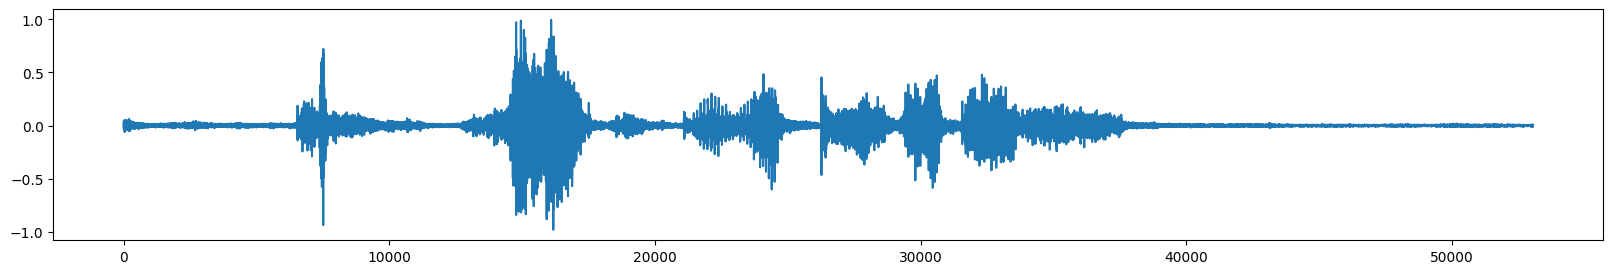

In [6]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

Sationary noise remove

In [7]:
reduced_noise_stationary = nr.reduce_noise(y = data, sr=rate, n_std_thresh_stationary=1.5,stationary=True)

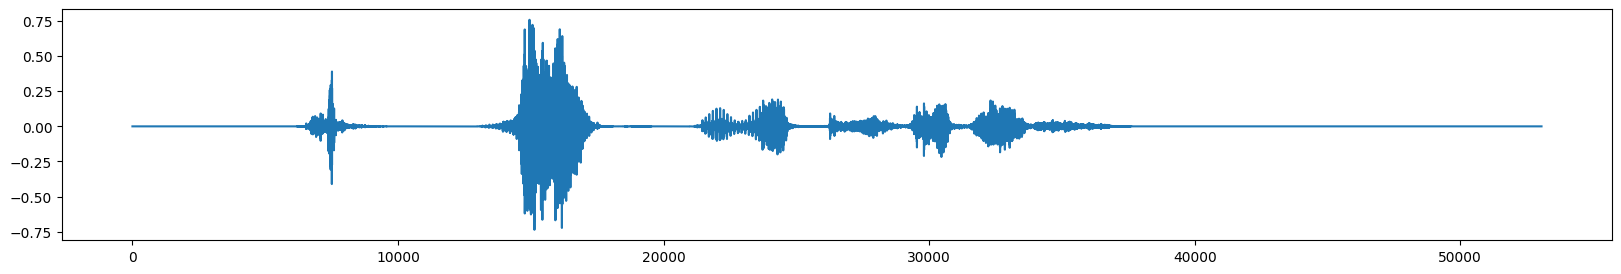

In [8]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise_stationary)
IPython.display.Audio(data=reduced_noise_stationary, rate=rate)

Non-stationary noise remove

In [9]:
reduced_noise_non_stationary = nr.reduce_noise(y = data, sr=rate, thresh_n_mult_nonstationary=2, stationary=False)

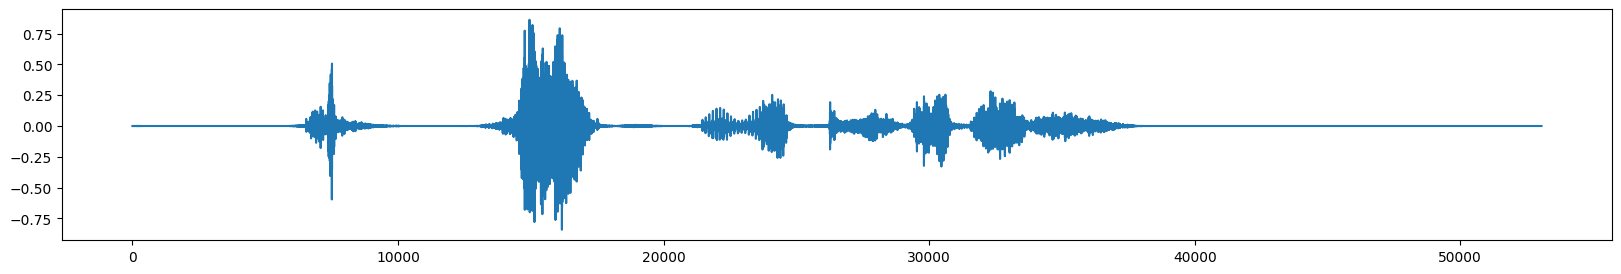

In [10]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise_non_stationary)
IPython.display.Audio(data=reduced_noise_non_stationary, rate=rate)

In [11]:
# import numpy as np
from scipy.signal import cwt, ricker

<ipython-input-12-0e86e0ea4e6f>:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


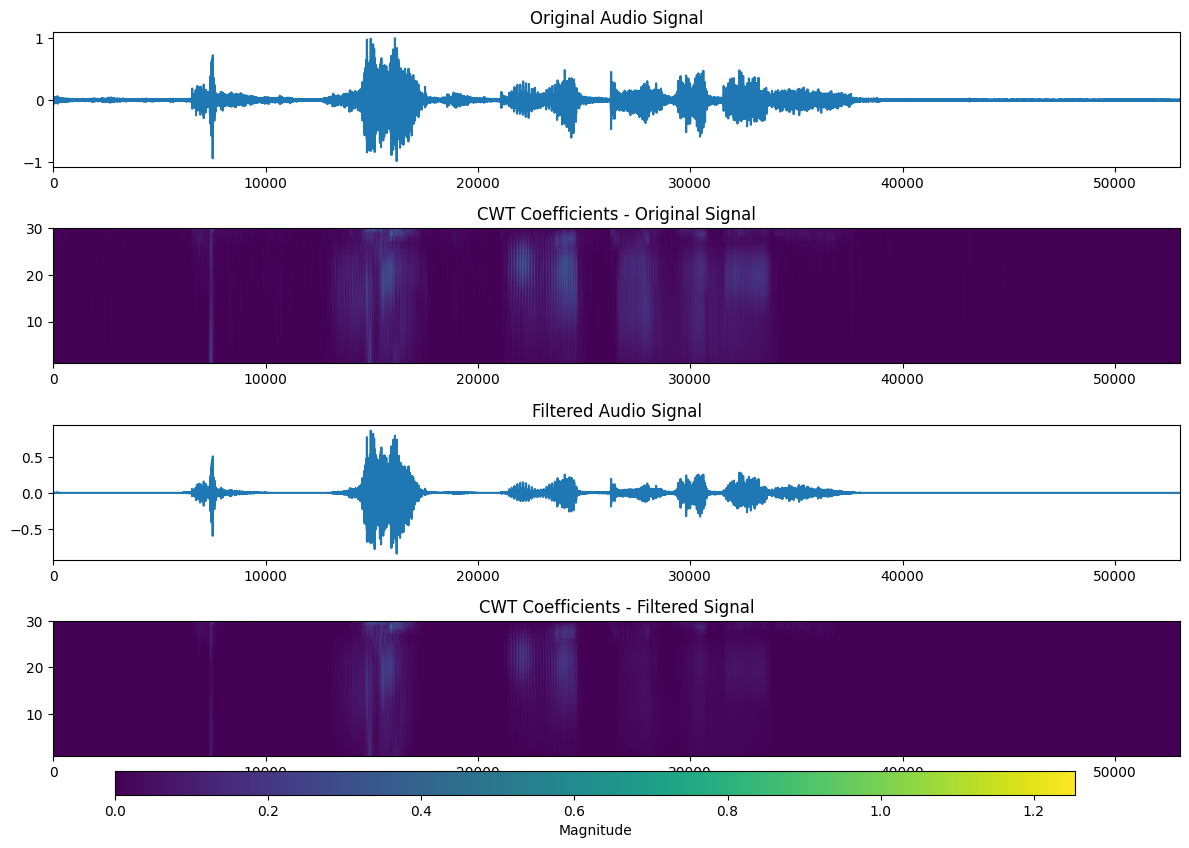

In [12]:
# Compute Continuous Wavelet Transform
wavelet_widths = np.arange(1, 31)
coeffs_original = cwt(data, ricker, wavelet_widths)

# Compute Continuous Wavelet Transform for the filtered signal
coeffs_filtered = cwt(reduced_noise_non_stationary, ricker, wavelet_widths)

plt.figure(figsize=(12, 8))

# Plot original audio signal
plt.subplot(4, 1, 1)
plt.plot(data)
plt.title('Original Audio Signal')

# Plot CWT coefficients for the original signal
plt.subplot(4, 1, 2, sharex=plt.gca())
im = plt.imshow(np.abs(coeffs_original), aspect='auto', extent=[0, len(data), min(wavelet_widths), max(wavelet_widths)])
plt.title('CWT Coefficients - Original Signal')


# Plot filtered audio signal
plt.subplot(4, 1, 3, sharex=plt.gca())
plt.plot(reduced_noise_non_stationary)
plt.title('Filtered Audio Signal')



# Plot CWT coefficients for the filtered signal
plt.subplot(4, 1, 4, sharex=plt.gca())
im_filtered = plt.imshow(np.abs(coeffs_filtered), aspect='auto', extent=[0, len(reduced_noise_non_stationary), min(wavelet_widths), max(wavelet_widths)])
plt.title('CWT Coefficients - Filtered Signal')

# Move the colorbar to the bottom for the filtered signal
cbar_ax_filtered = plt.gcf().add_axes([0.1, 0, 0.8, 0.03])  # Adjust the parameters as needed
plt.colorbar(im_filtered, cax=cbar_ax_filtered, orientation='horizontal', label='Magnitude')

plt.tight_layout()
plt.show()


In [13]:
total_duration = 0
for i in os.listdir(single_enroll_loc):
  data, rate = sf.read(single_enroll_loc + i)
  total_duration += len(data) / float(rate)

print(total_duration/60)


24.704772916666652


Denoise all single channel audios

In [4]:
denoised_single_enrollment_loc = '/content/drive/MyDrive/ROBOVOX_SP_CUP_2024/data/single-channel/denoised_enrollments/'

for i in os.listdir(single_enroll_loc):
  data, rate = sf.read(single_enroll_loc + i)
  reduced_noise_non_stationary = nr.reduce_noise(y = data, sr=rate, thresh_n_mult_nonstationary=2, stationary=False)
  sf.write(denoised_single_enrollment_loc+i, reduced_noise_non_stationary, rate)

